In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
df = pd.read_csv("package.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [65]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('package', axis = 1), df['package'], test_size=0.2)
x_train.head()

,cgpa
130,6.68
181,8.22
157,6.47
30,7.36
92,7.90


In [99]:
# SLR from scratch

class sim_reg_imp:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, x_train, y_train):

        num = 0
        den = 0

        for i in range(x_train.shape[0]):

            num += (x_train.iloc[i] - x_train.mean()) * (y_train.iloc[i] - y_train.mean())
            den += (x_train.iloc[i] - x_train.mean()) ** 2

        self.m = num / den
        self.b = y_train.mean() - self.m * x_train.mean()

        print(self.m)
        print(self.b)

    def predict(self, x_test):
        print(x_test)

        return self.m * x_test + self.b

In [67]:
sr_imp = sim_reg_imp()

In [68]:
sr_imp.fit(x_train, y_train)

cgpa    0.565441
dtype: float64
cgpa   -0.986791
dtype: float64


In [69]:
y_pred = sr_imp.predict(x_test)

     cgpa
33   6.35
75   6.97
111  5.42
143  4.85
110  8.18
109  7.77
77   8.99
112  8.58
145  5.84
191  7.28
127  6.78
95   6.63
9    8.31
37   5.90
88   4.73
90   7.11
65   7.60
74   6.85
71   7.47
161  7.30
8    6.09
52   8.37
156  7.38
162  5.53
138  7.91
36   5.99
148  7.57
193  4.57
117  7.12
176  6.29
73   8.44
158  5.95
196  5.89
76   6.94
72   7.78
160  7.13
67   6.51
86   7.61
147  5.66
131  6.37


In [70]:
r2 = r2_score(y_test, y_pred)

In [71]:
mse = mean_squared_error(y_test, y_pred)

In [72]:
mae = mean_absolute_error(y_test, y_pred)

In [73]:
print(r2) # r2 score
print(mse) # mean squared error
print(mae) # mean absolute eroor

0.778190898912118
0.11487270149933435
0.28342853362831766


In [84]:
n = x_test.shape
n

(40, 1)

In [91]:
# RMSE

rmse = np.sqrt(mse)
print(rmse)

# adjusted r2

adj_r2 = 1 - ((1 - r2) * (40 - 1)) / (40 - 1 - 1)
print(adj_r2)

0.3389287557870154
0.7723538173045421


     cgpa
130  6.68
181  8.22
157  6.47
30   7.36
92   7.90
..    ...
93   6.79
56   5.84
59   7.56
46   6.07
124  6.06

[160 rows x 1 columns]


Text(0, 0.5, 'Package(in lpa)')

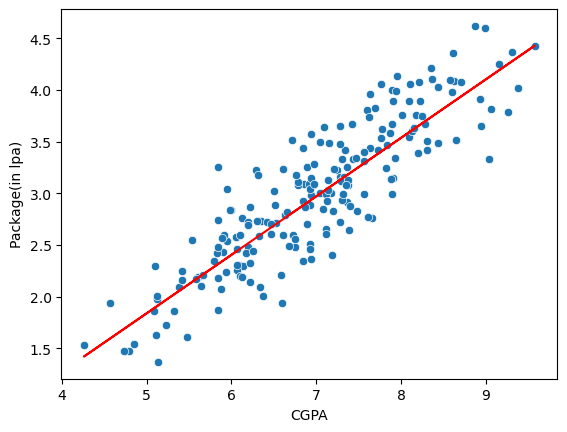

In [92]:
sns.scatterplot(x = df['cgpa'], y = df['package'])
plt.plot(x_train, sr_imp.predict(x_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [93]:
# using sklearn 

lr = LinearRegression()

In [94]:
lr.fit(x_train, y_train)

LinearRegression()

In [95]:
y_pred2 = lr.predict(x_test)

In [98]:
r2_lr = r2_score(y_test, y_pred2)
mse_lr = mean_squared_error(y_test, y_pred2)
mae_lr = mean_absolute_error(y_test, y_pred2)
rmse_lr = np.sqrt(mse_lr)
adj_r2_lr = ((1 - r2_lr) * (40 - 1)) / (40 - 1 - 1)

In [97]:
print(r2_lr)
print(mse_lr)
print(mae_lr)
print(rmse_lr)
print(adj_r2_lr)

0.7781908989121181
0.1148727014993343
0.28342853362831766
0.33892875578701537
0.22764618269545783
